In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from scipy.optimize      import curve_fit
import os

## Round of errors, encontrar el valor de epsilon para el cual 1. + epsilon = 1. 
### El error de truncación es una característica del algoritmo. Se expande alrededor de un punto despreciando terminos superiores: truncación para $|x| << 1$:

$f(x) = sin(x) = x - \frac{x^{3}}{6} + \mathcal{O}(x^{5})$

In [6]:
epsilon = 1.
while ( 1. + epsilon != 1 ):
    epsilon = 0.5*epsilon

print(epsilon)

1.11022302463e-16


In [13]:
def epsilon(x):
    return np.sin(x) - (x - (x**3)/6.)

x = np.pi

#quiero mostrar que la precision va como 2**5 = 32

print(" x = %f , epsilon = %e" %(x,epsilon(x)))
print(" x = %f , epsilon = %e" %(x/4,epsilon(x/4)))
print("The ratio of these values is %f " %(epsilon(x)/epsilon(x/4)))

 x = 3.141593 , epsilon = 2.026120e+00
 x = 0.785398 , epsilon = 2.454130e-03
The ratio of these values is 825.596095 


In [14]:
def Function(x):
    return np.sin(x)

def ExactDerivative(x):
    return np.cos(x)

In [16]:
def Fill(f, xi_, xf_, h_):
    
    X = []
    Y = []
    
    while xi_ < xf_:
        X = np.append(X, xi_)
        Y = np.append(Y, f(xi_))
        xi_ = xi_ + h_
        
    return X, Y

In [34]:
xi, xf, Npoints = 0., 2*np.pi, 60
h = (xf-xi)/float(Npoints)
print(h)

0.10471975512


In [36]:
X, Y = Fill(Function, xi, xf, h)
X, DY = Fill(ExactDerivative, xi, xf, h)
print(len(X))

61


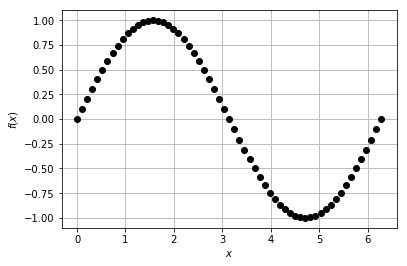

In [37]:
plt.plot(X,Y,'ko', label='')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()

In [49]:
def LefDerivative(f, xi, h):
    d = 0
    if( h != 0):
        d = ( f(xi)-f(xi-h) )/h

    return d

def RightDerivative(f, xi, h):
    d = 0
    if( h != 0):
        d = ( f(xi+h)-f(xi) )/h

    return d
    

In [50]:
print(LefDerivative(Function, 0.5*np.pi, h))
print(RightDerivative(Function, 0.5*np.pi, h))

0.052312045854834774
-0.05231204585483371


In [51]:
Dly = []
Dry = []

for i in X:
    Dly = np.append(Dly, LefDerivative(Function, i, h))
    Dry = np.append(Dry, RightDerivative(Function, i, h))
    
Errorl = abs(Dly-DY)
Errorr = abs(Dry-DY)


#for i in range(len(X)):
    #print('%f ' r'+-'  ' %e' %(Dly[i], Errorl[i]))

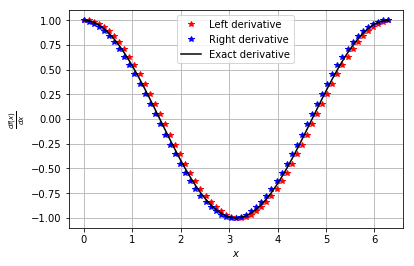

In [52]:
fig, ax = plt.subplots()
p1 = ax.plot(X, Dly, 'r*', label='Left derivative')
p2 = ax.plot(X, Dry, 'b*', label='Right derivative')
p3 = ax.plot(X, DY, 'k', label='Exact derivative')

plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{df(x)}{dx}$')
ax.legend()
plt.grid()

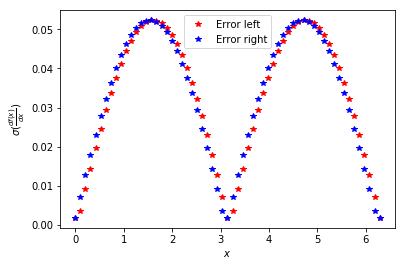

In [53]:
fig, ax = plt.subplots()
p1 = ax.plot(X, Errorl, 'r*', label='Error left')
p2 = ax.plot(X, Errorr, 'b*', label='Error right')

plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(\frac{df(x)}{dx})$')
ax.legend()